# Regression Week 4: Ridge Regression Assignment 1

In [1]:
import pandas as pd

In [2]:
def polynomial_sframe(feature, degree):
    # assume that degree >= 1
    # initialize the SFrame:
    poly_sframe = pd.DataFrame()
    # and set poly_sframe['power_1'] equal to the passed feature
    poly_sframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # then assign poly_sframe[name] to the appropriate power of feature
            poly_sframe[name] = feature.apply(lambda x: x**power)
    return poly_sframe

In [3]:
kc_test = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_test_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_train = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_train_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_validation = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_valid_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [4]:
kc_1 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_1_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_2 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_2_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_3 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_3_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})
kc_4 = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week3/wk3_kc_house_set_4_data.csv', dtype= {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int})

In [5]:
kc_train = kc_train.sort_values(by = ['sqft_living', 'price'])

In [8]:
poly1_data = polynomial_sframe(kc_train['sqft_living'], 15)
output = kc_train['price'] # add price to the data since it's the target
l2_small_penalty = 1.5e-5

In [9]:
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [11]:
model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
regr = model.fit(poly1_data, output)

In [15]:
regr.coef_[0]

139.84835024962658

# Observe Overfitting

In [16]:
l2_small_penalty=1e-9

In [24]:
def poly_model(dataset):
    poly15_data1 = polynomial_sframe(dataset['sqft_living'], 15)
    output1 = dataset['price'] # add price to the data since it's the target
    model = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
    regr15_1 = model.fit(poly15_data1, output1)
    print('Slope:', regr15_1.coef_, '\nIntercept:', regr15_1.intercept_)
    plt.plot(poly15_data1['power_1'],output1,'.',
        poly15_data1['power_1'], regr15_1.predict(poly15_data1),'-')
    feature_1_coef = regr15_1.coef_[0]
    return(feature_1_coef)

Slope: [  5.44669376e+02  -3.55447580e-01   1.22446368e-04  -1.17175278e-08
  -3.90512972e-13  -1.39075896e-17   1.47860259e-20   6.87492376e-25
  -7.57204175e-29  -1.04097336e-32  -3.71843943e-37   3.39989317e-41
   5.56591999e-45   2.53761435e-49  -3.35152943e-53] 
Intercept: 23888.8332888
Slope: [  5.44669376e+02  -3.55447580e-01   1.22446368e-04  -1.17175278e-08
  -3.90512972e-13  -1.39075896e-17   1.47860259e-20   6.87492376e-25
  -7.57204175e-29  -1.04097336e-32  -3.71843943e-37   3.39989317e-41
   5.56591999e-45   2.53761435e-49  -3.35152943e-53] 
Intercept: 23888.8332888
[544.66937567505636]


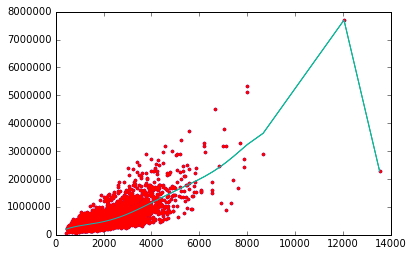

In [26]:
poly_model(kc_1)
feature_1_coef_list = []
feature_1_coef_list.append(poly_model(kc_1))
print(feature_1_coef_list)

Slope: [  8.59362612e+02  -8.18118183e-01   4.28879879e-04  -9.12770077e-08
  -2.69606133e-12   3.73980536e-15  -1.42711908e-19  -6.30794906e-23
  -1.44559687e-27   7.44321610e-31   9.25866075e-35   3.27974536e-41
  -1.29543502e-42  -1.38781261e-46   1.66546452e-50] 
Intercept: -55614.6371048
Slope: [  8.59362612e+02  -8.18118183e-01   4.28879879e-04  -9.12770077e-08
  -2.69606133e-12   3.73980536e-15  -1.42711908e-19  -6.30794906e-23
  -1.44559687e-27   7.44321610e-31   9.25866075e-35   3.27974536e-41
  -1.29543502e-42  -1.38781261e-46   1.66546452e-50] 
Intercept: -55614.6371048


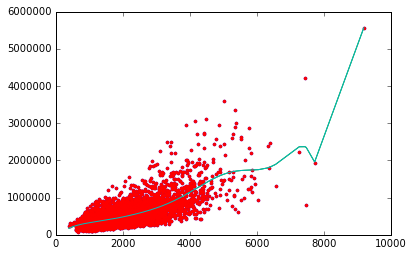

In [27]:
poly_model(kc_2)
feature_1_coef_list.append(poly_model(kc_2))

Slope: [ -7.55395916e+02   9.75579484e-01  -4.58945974e-04   7.77958020e-08
   7.15013519e-12  -2.88601996e-15  -2.13677987e-20   3.38085238e-23
   2.19178142e-27  -1.97067733e-31  -4.15993090e-35  -1.80196317e-39
   3.19071186e-43   5.08456981e-47  -3.93304294e-51] 
Intercept: 470987.859376
Slope: [ -7.55395916e+02   9.75579484e-01  -4.58945974e-04   7.77958020e-08
   7.15013519e-12  -2.88601996e-15  -2.13677987e-20   3.38085238e-23
   2.19178142e-27  -1.97067733e-31  -4.15993090e-35  -1.80196317e-39
   3.19071186e-43   5.08456981e-47  -3.93304294e-51] 
Intercept: 470987.859376


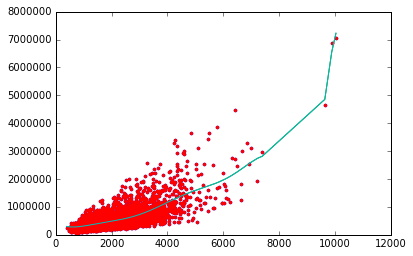

In [28]:
poly_model(kc_3)
feature_1_coef_list.append(poly_model(kc_3))

Slope: [  1.11944572e+03  -9.83760236e-01   3.38770920e-04   3.60377089e-08
  -4.37813981e-11   5.77191626e-15   7.66795302e-19  -9.49297780e-23
  -1.96030805e-26  -2.10881952e-32   3.31005108e-34   3.47733782e-38
  -2.43039194e-42  -8.79553285e-46   6.44569669e-50] 
Intercept: -145655.620904
Slope: [  1.11944572e+03  -9.83760236e-01   3.38770920e-04   3.60377089e-08
  -4.37813981e-11   5.77191626e-15   7.66795302e-19  -9.49297780e-23
  -1.96030805e-26  -2.10881952e-32   3.31005108e-34   3.47733782e-38
  -2.43039194e-42  -8.79553285e-46   6.44569669e-50] 
Intercept: -145655.620904


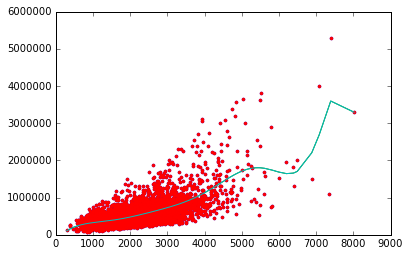

In [29]:
poly_model(kc_4)
feature_1_coef_list.append(poly_model(kc_4))

In [31]:
print(feature_1_coef_list)
print(min(feature_1_coef_list))
print(max(feature_1_coef_list))

[544.66937567505636, 859.36261221950701, -755.39591555886466, 1119.4457240810073]
-755.395915559
1119.44572408


# Ridge regression comes to rescue

In [32]:
l2_large_penalty=1.23e2

In [34]:
def poly_model_large(dataset):
    poly15_data1 = polynomial_sframe(dataset['sqft_living'], 15)
    output1 = dataset['price'] # add price to the data since it's the target
    model = linear_model.Ridge(alpha=l2_large_penalty, normalize=True)
    regr15_1 = model.fit(poly15_data1, output1)
    print('Slope:', regr15_1.coef_, '\nIntercept:', regr15_1.intercept_)
    plt.plot(poly15_data1['power_1'],output1,'.',
        poly15_data1['power_1'], regr15_1.predict(poly15_data1),'-')
    feature_1_coef = regr15_1.coef_[0]
    return(feature_1_coef)

Slope: [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58] 
Intercept: 539103.031058
Slope: [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58] 
Intercept: 539103.031058


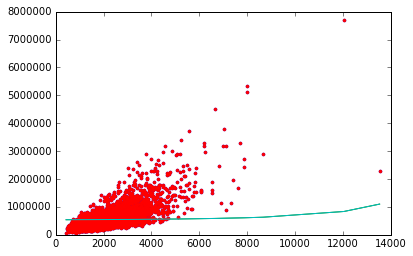

In [35]:
poly_model_large(kc_1)
feature_1_coef_list1 = []
feature_1_coef_list1.append(poly_model_large(kc_1))

Slope: [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55] 
Intercept: 529853.025358
Slope: [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55] 
Intercept: 529853.025358


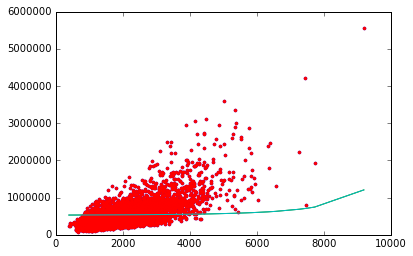

In [36]:
poly_model_large(kc_2)
feature_1_coef_list1.append(poly_model_large(kc_2))

Slope: [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56] 
Intercept: 533640.114097
Slope: [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56] 
Intercept: 533640.114097


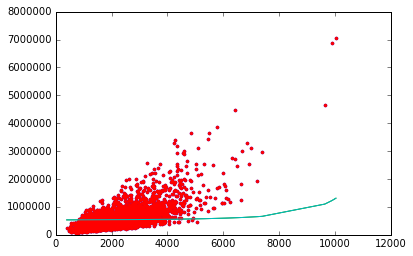

In [37]:
poly_model_large(kc_3)
feature_1_coef_list1.append(poly_model_large(kc_3))

Slope: [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55] 
Intercept: 524562.969047
Slope: [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.01609632e-23   2.34605255e-27
   2.75636073e-31   3.27043069e-35   3.91046855e-39   4.70118041e-43
   5.67212304e-47   6.85958087e-51   8.30843630e-55] 
Intercept: 524562.969047


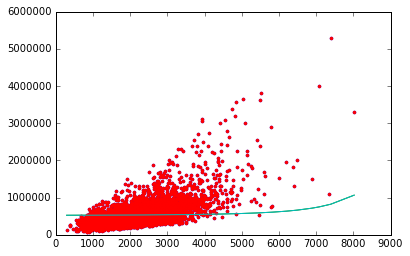

In [38]:
poly_model_large(kc_4)
feature_1_coef_list1.append(poly_model_large(kc_4))

In [39]:
print(feature_1_coef_list1)
print(min(feature_1_coef_list1))
print(max(feature_1_coef_list1))

[2.3280680295793243, 2.0975690277785519, 2.2890625811892011, 2.0859619409193066]
2.08596194092
2.32806802958


# Selecting an L2 penalty via cross-validation

In [40]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
train_valid_shuffled = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week4/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('c://users/intel/Desktop/Coursera/Regression/week4/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [83]:
from math import floor

In [64]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in range(0, k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    rnd_start = int(floor((n*i)/k))
    rnd_end = int(floor((n*(i+1))/k-1))
    print( i, (start, end), '\t', (rnd_start, rnd_end), '\t', rnd_end-rnd_start, '\t', (0, rnd_start), '\t', (rnd_end+1, n) , '\t', (rnd_start, rnd_end+1))

0 (0.0, 1938.6) 	 (0, 1938) 	 1938 	 (0, 0) 	 (1939, 19396) 	 (0, 1939)
1 (1939.6, 3878.2) 	 (1939, 3878) 	 1939 	 (0, 1939) 	 (3879, 19396) 	 (1939, 3879)
2 (3879.2, 5817.8) 	 (3879, 5817) 	 1938 	 (0, 3879) 	 (5818, 19396) 	 (3879, 5818)
3 (5818.8, 7757.4) 	 (5818, 7757) 	 1939 	 (0, 5818) 	 (7758, 19396) 	 (5818, 7758)
4 (7758.4, 9697.0) 	 (7758, 9697) 	 1939 	 (0, 7758) 	 (9698, 19396) 	 (7758, 9698)
5 (9698.0, 11636.6) 	 (9698, 11636) 	 1938 	 (0, 9698) 	 (11637, 19396) 	 (9698, 11637)
6 (11637.6, 13576.2) 	 (11637, 13576) 	 1939 	 (0, 11637) 	 (13577, 19396) 	 (11637, 13577)
7 (13577.2, 15515.8) 	 (13577, 15515) 	 1938 	 (0, 13577) 	 (15516, 19396) 	 (13577, 15516)
8 (15516.8, 17455.4) 	 (15516, 17455) 	 1939 	 (0, 15516) 	 (17456, 19396) 	 (15516, 17456)
9 (17456.4, 19395.0) 	 (17456, 19395) 	 1939 	 (0, 17456) 	 (19396, 19396) 	 (17456, 19396)


In [66]:
train_valid_shuffled[19395:19396] # select rows 0 to 9

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19395,7237300290,20150326T000000,338000.0,5.0,2.5,2400.0,4496,2.0,0,0,...,7,2400,0,2004,0,98042,47.3692,-122.126,1880.0,4319.0


In [86]:
def k_fold_cross_validation(k, l2_penalty, data):
    RSS = []
    for i in range(0, k):
        rnd_start = int(floor((n*i)/k))
        rnd_end = int(floor((n*(i+1))/k-1))
        train_set = data[0:rnd_start].append(data[rnd_end+2:n])
        valid_set = data[rnd_start:rnd_end+1]
        poly15_train = polynomial_sframe(train_set['sqft_living'], 15)
        output_train = train_set['price'] # add price to the data since it's the target
        poly15_valid = polynomial_sframe(valid_set['sqft_living'], 15)
        output_valid = valid_set['price'] # add price to the data since it's the target
        model = linear_model.Ridge(alpha=l2_penalty, normalize=True)
        regr15 = model.fit(poly15_train, output_train)
        residuals = regr15.predict(poly15_valid) - output_valid
        RSS.append(sum(residuals**2))
    return(sum(RSS)/len(RSS))

In [87]:
print(k_fold_cross_validation(10, 1.23e2, train_valid_shuffled))

2.58740676676e+14


In [89]:
for l2_penalty in np.logspace(3, 9, num=13):
    print(l2_penalty, '\t', k_fold_cross_validation(10, l2_penalty, train_valid_shuffled))

1000.0 	 2.64977327104e+14
3162.27766017 	 2.65692902547e+14
10000.0 	 2.65924335801e+14
31622.7766017 	 2.65998048397e+14
100000.0 	 2.66021411456e+14
316227.766017 	 2.66028804825e+14
1000000.0 	 2.66031143346e+14
3162277.66017 	 2.66031882904e+14
10000000.0 	 2.66032116779e+14
31622776.6017 	 2.66032190737e+14
100000000.0 	 2.66032214124e+14
316227766.017 	 2.6603222152e+14
1000000000.0 	 2.66032223859e+14


In [90]:
def poly_model_new(train_dataset, validation_dataset, degree):
    poly15_data1 = polynomial_sframe(train_dataset['sqft_living'], degree)
    output1 = train_dataset['price'] # add price to the data since it's the target
    poly15_data_val = polynomial_sframe(validation_dataset['sqft_living'], degree)
    output_val = validation_dataset['price'] # add price to the data since it's the target
    model = linear_model.Ridge(alpha=1000.0, normalize=True)
    regr15_1 = model.fit(poly15_data1, output1)
    residuals = regr15_1.predict(poly15_data_val) - output_val
    RSS = sum(residuals**2)
    return(RSS)

In [91]:
poly_model_new(kc_train, kc_test, 15)

283756877067954.88